In [ ]:
"""
TMN Simulation 
Last Update:2017-02-19
Date: 2017-02-10
Author: Lee Carlin
@lee1carlin@gmail.com
"""

In [ ]:
"""
1) Generating Normal Multivariates
2) Playing with Correlations
3) Visualization

"""

In [28]:
# Loading Modules:
import scipy.stats as ss
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline


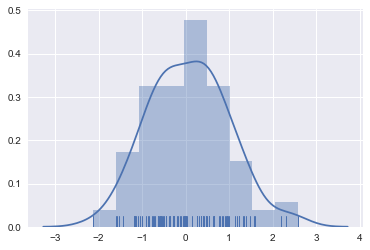

In [25]:
x = np.random.normal(size=100)
sns.distplot(x, bins=None, hist=True, kde=True, rug=True, fit=None, hist_kws=None,
             kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False,
             norm_hist=False, axlabel=None, label=None, ax=None);

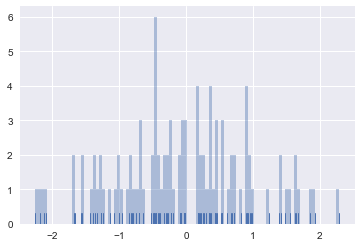

In [24]:
sns.distplot(x, bins=100, kde=False, rug=True)

In [29]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

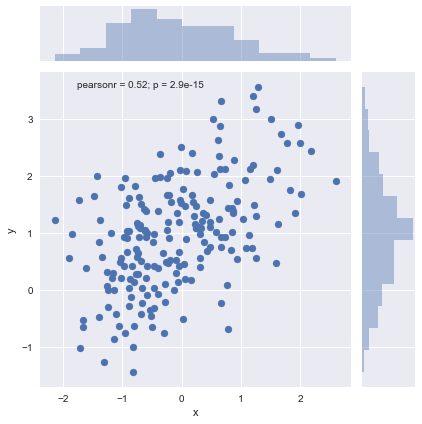

In [30]:
sns.jointplot(x="x", y="y", data=df);

In [17]:
#univariate: 

x = np.linspace(-5, 5, 20, endpoint=False)
x

array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

In [10]:
y = ss.multivariate_normal.pdf(x, mean=2.5, cov=0.5); y

array([  2.10068269e-25,   2.95798148e-22,   2.52629000e-19,
         1.30865062e-16,   4.11165802e-14,   7.83543327e-12,
         9.05652948e-10,   6.34911734e-08,   2.69971339e-06,
         6.96265260e-05,   1.08914212e-03,   1.03334927e-02,
         5.94651446e-02,   2.07553749e-01,   4.39391289e-01,
         5.64189584e-01,   4.39391289e-01,   2.07553749e-01,
         5.94651446e-02,   1.03334927e-02])

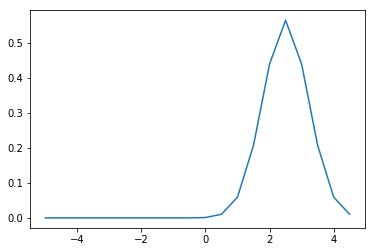

In [11]:
plt.plot(x, y)

In [ ]:
>>> from scipy.stats import multivariate_normal
>>> x = np.linspace(0, 5, 10, endpoint=False)
>>> y = multivariate_normal.pdf(x, mean=2.5, cov=0.5); y
array([ 0.00108914,  0.01033349,  0.05946514,  0.20755375,  0.43939129,
        0.56418958,  0.43939129,  0.20755375,  0.05946514,  0.01033349])
>>> plt.plot(x, y)

(array([    6.,    17.,    27.,    97.,   187.,   360.,   552.,   774.,
         1081.,  1294.,  1312.,  1252.,  1058.,   802.,   562.,   303.,
          174.,    78.,    48.,    11.,     5.]),
 array([-10.        ,  -9.04761905,  -8.0952381 ,  -7.14285714,
         -6.19047619,  -5.23809524,  -4.28571429,  -3.33333333,
         -2.38095238,  -1.42857143,  -0.47619048,   0.47619048,
          1.42857143,   2.38095238,   3.33333333,   4.28571429,
          5.23809524,   6.19047619,   7.14285714,   8.0952381 ,
          9.04761905,  10.        ]),
 <a list of 21 Patch objects>)

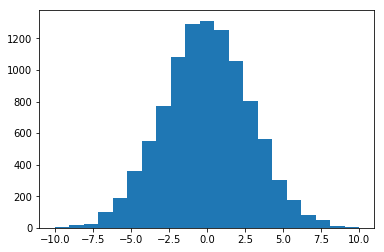

In [5]:
x = np.arange(-10, 11)
xU, xL = x + 0.5, x - 0.5 
prob = ss.norm.cdf(xU, scale = 3) - ss.norm.cdf(xL, scale = 3)
prob = prob / prob.sum() #normalize the probabilities so their sum is 1
nums = np.random.choice(x, size = 10000, p = prob)
plt.hist(nums, bins = len(x))

(array([    43.,    129.,    421.,    933.,   1754.,   3395.,   5470.,
          8028.,  10640.,  12343.,  13259.,  12443.,  10760.,   8117.,
          5482.,   3470.,   1833.,    911.,    373.,    163.,     33.]),
 array([-10.        ,  -9.04761905,  -8.0952381 ,  -7.14285714,
         -6.19047619,  -5.23809524,  -4.28571429,  -3.33333333,
         -2.38095238,  -1.42857143,  -0.47619048,   0.47619048,
          1.42857143,   2.38095238,   3.33333333,   4.28571429,
          5.23809524,   6.19047619,   7.14285714,   8.0952381 ,
          9.04761905,  10.        ]),
 <a list of 21 Patch objects>)

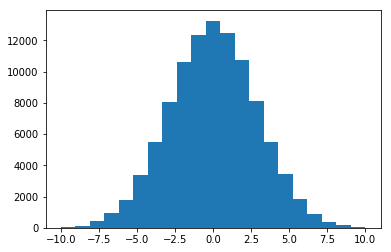

In [7]:


scale = 3.
range = 10
size = 100000

X = ss.truncnorm(a=-range/scale, b=+range/scale, scale=scale).rvs(size=size)
X = X.round().astype(int)
bins = 2 * range + 1
plt.hist(X, bins)